In [ ]:
pip install comet_ml --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.9/731.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 43.0 MB/s eta 0:00:00


In [ ]:
pip install scipy --quiet


In [ ]:
pip install mitdeeplearning --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 24.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 681.5/681.5 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 131.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 110.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 kB 6.0 MB/s eta 0:00:00


In [ ]:

import comet_ml
from comet_ml import start
from comet_ml.integration.pytorch import log_model

experiment = start(
  api_key="mfq8WTlM0gHW140OWD2A1vsC4",
  project_name="MusicGenerator",
  workspace="sanjana-jk"
)
COMET_API_KEY = "mfq8WTlM0gHW140OWD2A1vsC4"

# Import PyTorch and other relevant libraries
import torch
import torch.nn as nn
import torch.optim as optim

# Download and import the MIT Introduction to Deep Learning package
import mitdeeplearning as mdl

# Import all remaining packages
import numpy as np
import os
import time
import functools
from IPython import display as ipythondisplay
from tqdm import tqdm
from scipy.io.wavfile import write
!apt-get install abcmidi timidity > /dev/null 2>&1


# Check that we are using a GPU, if not switch runtimes
#   using Runtime > Change Runtime Type > GPU
assert torch.cuda.is_available(), "Please enable GPU from runtime settings"
assert COMET_API_KEY != "", "Please insert your Comet API Key"

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.com https://www.comet.com/sanjana-jk/musicgenerator/a6120ad19a384fcf8a621b3bd2b41012

COMET INFO: Couldn't find a Git repository in '/content' nor in any parent directory. Set `COMET_GIT_DIRECTORY` if your Git Repository is elsewhere.
Gym has been unmaintained since 2022 and does not support NumPy 2.0 amongst other critical functionality.
Please upgrade to Gymnasium, the maintained drop-in replacement of Gym, or contact the authors of your software and request that they upgrade.
See the migration guide at https://gymnasium.farama.org/introduction/migration_guide/ for additional information.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezo

In [ ]:
#download database
songs = mdl.lab1.load_training_data()

# Print one of the songs to inspect it in greater detail!
example_song = songs[0]
print("\nExample song: ")
print(example_song)

Found 817 songs in text

Example song: 
X:1
T:Alexander's
Z: id:dc-hornpipe-1
M:C|
L:1/8
K:D Major
(3ABc|dAFA DFAd|fdcd FAdf|gfge fefd|(3efe (3dcB A2 (3ABc|!
dAFA DFAd|fdcd FAdf|gfge fefd|(3efe dc d2:|!
AG|FAdA FAdA|GBdB GBdB|Acec Acec|dfaf gecA|!
FAdA FAdA|GBdB GBdB|Aceg fefd|(3efe dc d2:|!


In [ ]:
mdl.lab1.play_song(example_song)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
songs_joined= "\n\n".join(songs)

#find unique chars, set contains onyl unique elements, sorter sorts in alpha ord
vocab= sorted(set(songs_joined))
print("There are",len(vocab), "unique characters in the dataset")

#goal: train model to learn patterns in abd music and use it go generate a new peice
#given a chat or a seq of char, whats the most probable next char?




There are 83 unique characters in the dataset


In [ ]:
#vectroize the test
#2 tables: one to map chars to numebrs and toehr vice versa
char2idx = {u:i for i, u in enumerate(vocab)} #enum goes thru data and gives index

idx2char= np.array(vocab) #numpy converst vocab into numpy array, easier for acess

print('{')
for char, _ in zip(char2idx,range(20)):
  print('  {:4s}: {:3d},'.format(repr(char), char2idx[char]))
print('  ...\n}')

{
  '\n':   0,
  ' ' :   1,
  '!' :   2,
  '"' :   3,
  '#' :   4,
  "'" :   5,
  '(' :   6,
  ')' :   7,
  ',' :   8,
  '-' :   9,
  '.' :  10,
  '/' :  11,
  '0' :  12,
  '1' :  13,
  '2' :  14,
  '3' :  15,
  '4' :  16,
  '5' :  17,
  '6' :  18,
  '7' :  19,
  ...
}


In [ ]:
#vectorize the songs string
def vectorize_string(string):
  vectorized_output= np.array([char2idx[char] for char in string])
  return vectorized_output

vectorized_songs= vectorize_string(songs_joined)
print ('{} ---- characters mapped to int ----> {}'.format(repr(songs_joined[:10]), vectorized_songs[:10]))
# check that vectorized_songs is a numpy array
assert isinstance(vectorized_songs, np.ndarray), "returned result should be a numpy array"

'X:1\nT:Alex' ---- characters mapped to int ----> [49 22 13  0 45 22 26 67 60 79]


In [ ]:
#convert char indices into seq of desired size
def get_batch(vectorized_songs, seq_length, batch_size):
  n= vectorized_songs.shape[0]-1
  idx= np.random.choice(n- seq_length, batch_size)

#an array w seqs which r vectorized. dont include seq_length
  input_batch = []
  output_batch = []
  for start in idx:
    # slice input n output sequence of length seq_length
    input_batch.append( vectorized_songs[start:start+seq_length])
    output_batch.append(vectorized_songs[start+1:start+seq_length+1])

  #add to batch list
  input_batch = np.array(input_batch)
  output_batch = np.array(output_batch)
  #makeit a 2d numpy array
  input_batch = np.array(input_batch)
  output_batch = np.array(output_batch)
  #convert to tensors
  x_batch = torch.tensor(input_batch, dtype=torch.long)
  y_batch = torch.tensor(output_batch, dtype=torch.long)
  return x_batch, y_batch

test_args = (vectorized_songs, 10, 2)
x_batch, y_batch = get_batch(*test_args)
assert x_batch.shape == (2, 10), "x_batch shape is incorrect"
assert y_batch.shape == (2, 10), "y_batch shape is incorrect"
print("Batch function works correctly!")



Batch function works correctly!


In [ ]:
x_batch, y_batch = get_batch(vectorized_songs, seq_length=5, batch_size=1)

for i, (input_idx, target_idx) in enumerate(zip(x_batch[0], y_batch[0])):
    print("Step {:3d}".format(i))
    print("  input: {} ({:s})".format(input_idx, repr(idx2char[input_idx.item()])))
    print("  expected output: {} ({:s})".format(target_idx, repr(idx2char[target_idx.item()])))

Step   0
  input: 38 (np.str_('M'))
  expected output: 22 (np.str_(':'))
Step   1
  input: 22 (np.str_(':'))
  expected output: 18 (np.str_('6'))
Step   2
  input: 18 (np.str_('6'))
  expected output: 11 (np.str_('/'))
Step   3
  input: 11 (np.str_('/'))
  expected output: 20 (np.str_('8'))
Step   4
  input: 20 (np.str_('8'))
  expected output: 0 (np.str_('\n'))


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
### Defining the RNN Model ###

'''TODO: Add LSTM and Linear layers to define the RNN model using nn.Module'''
class LSTMModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size):
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size

        # Define each of the network layers
        # Layer 1: Embedding layer to transform indices into dense vectors
        #   of a fixed embedding size
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        '''TODO: Layer 2: LSTM with hidden_size `hidden_size`. note: number of layers defaults to 1.
         Use the nn.LSTM() module from pytorch.'''
        self.lstm = nn.LSTM(input_size=embedding_dim, hidden_size=hidden_size,batch_first=True)

        '''TODO: Layer 3: Linear (fully-connected) layer that transforms the LSTM output
        #   into the vocabulary size.'''
        self.fc = nn.Linear(hidden_size, vocab_size)

    def init_hidden(self, batch_size, device):
        # Initialize hidden state and cell state with zeros
        return (torch.zeros(1, batch_size, self.hidden_size).to(device),
                torch.zeros(1, batch_size, self.hidden_size).to(device))

    def forward(self, x, state=None, return_state=False):
        x = self.embedding(x)

        if state is None:
            state = self.init_hidden(x.size(0), x.device)
        out, state = self.lstm(x, state)

        out = self.fc(out)
        return out if not return_state else (out, state)

In [ ]:
# Instantiate the model! Build a simple model with default hyperparameters. You
#     will get the chance to change these later.
vocab_size = len(vocab)
embedding_dim = 256
hidden_size = 1024
batch_size = 8

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMModel(vocab_size, embedding_dim, hidden_size).to(device)

# print out a summary of the model
print(model)

LSTMModel(
  (embedding): Embedding(83, 256)
  (lstm): LSTM(256, 1024, batch_first=True)
  (fc): Linear(in_features=1024, out_features=83, bias=True)
)


In [ ]:
# Test the model with some sample data
x, y = get_batch(vectorized_songs, seq_length=100, batch_size=32)
x = x.to(device)
y = y.to(device)

pred = model(x)
print("Input shape:      ", x.shape, " # (batch_size, sequence_length)")
print("Prediction shape: ", pred.shape, "# (batch_size, sequence_length, vocab_size)")

Input shape:       torch.Size([32, 100])  # (batch_size, sequence_length)
Prediction shape:  torch.Size([32, 100, 83]) # (batch_size, sequence_length, vocab_size)


In [ ]:
cross_entropy = nn.CrossEntropyLoss()  # instantiate the loss function

def compute_loss(labels, logits):
    """
    Inputs:
      labels: (batch_size, sequence_length)
      logits: (batch_size, sequence_length, vocab_size)

    Output:
      loss: scalar cross entropy loss over the batch and sequence length
    """
    # Flatten labels: (B, L) -> (B*L,)
    batched_labels = labels.view(-1)

    # Flatten logits: (B, L, V) -> (B*L, V)
    batched_logits = logits.view(-1, logits.size(2))

    # Compute cross-entropy loss
    loss = cross_entropy(batched_logits, batched_labels)

    return loss

In [ ]:
example_batch_loss = compute_loss(y, pred)  # y = true labels, pred = model logits

print(f"Prediction shape: {pred.shape} # (batch_size, sequence_length, vocab_size)")
print(f"scalar_loss:      {example_batch_loss.item()}")

Prediction shape: torch.Size([32, 100, 83]) # (batch_size, sequence_length, vocab_size)
scalar_loss:      4.420844554901123


In [ ]:

### Hyperparameter setting and optimization ###

vocab_size = len(vocab)

# Model parameters:
params = dict(
  num_training_iterations = 3000,  # Increase this to train longer
  batch_size = 8,  # Experiment between 1 and 64
  seq_length = 100,  # Experiment between 50 and 500
  learning_rate = 5e-3,  # Experiment between 1e-5 and 1e-1
  embedding_dim = 256,
  hidden_size = 1024,  # Experiment between 1 and 2048
)

# Checkpoint location:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "my_ckpt")
os.makedirs(checkpoint_dir, exist_ok=True)

In [ ]:
### Create a Comet experiment to track our training run ###

def create_experiment():
  # end any prior experiments
  if 'experiment' in locals():
    experiment.end()

  # initiate the comet experiment for tracking
  experiment = comet_ml.Experiment(
                  api_key=COMET_API_KEY,
                  project_name="6S191_Lab1_Part2")
  # log our hyperparameters, defined above, to the experiment
  for param, value in params.items():
    experiment.log_parameter(param, value)
  experiment.flush()

  return experiment

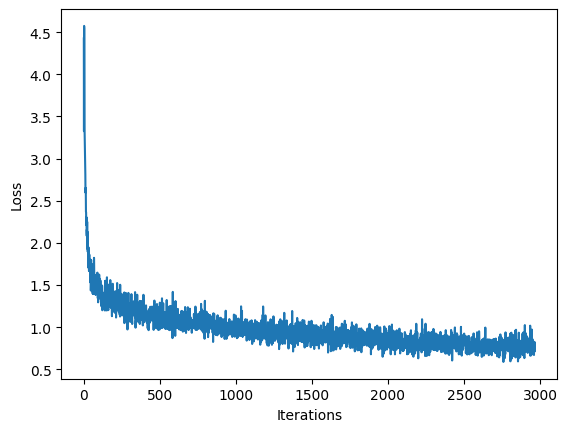

100%|██████████| 3000/3000 [01:30<00:00, 33.13it/s]
COMET INFO: Uploading 87 metrics, params and output messages


True

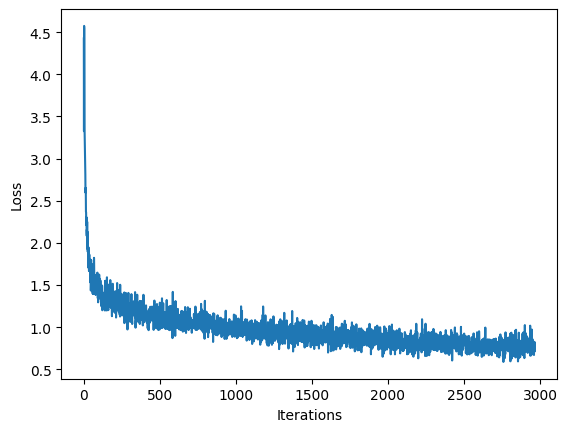

In [ ]:
### Define optimizer and training operation ###

# Instantiate a new LSTMModel model for training using the hyperparameters
model = LSTMModel(
    vocab_size=vocab_size,
    embedding_dim=params["embedding_dim"],
    hidden_size=params["hidden_size"]
)

# Move the model to the GPU
model.to(device)

# Instantiate an optimizer with its learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=params["learning_rate"])

def train_step(x, y):
    # Set the model's mode to train
    model.train()

    # Zero gradients for every step
    optimizer.zero_grad()

    # Forward pass: feed the current input into the model
    y_hat = model(x)

    # Compute the loss
    loss = compute_loss(y, y_hat)

    # Backward pass
    loss.backward()          # 1. Backpropagate the loss
    optimizer.step()         # 2. Update the model parameters
    return loss

# Begin training!#
##################

history = []
plotter = mdl.util.PeriodicPlotter(sec=2, xlabel='Iterations', ylabel='Loss')
experiment = create_experiment()

if hasattr(tqdm, '_instances'): tqdm._instances.clear() # clear if it exists
for iter in tqdm(range(params["num_training_iterations"])):

    # Grab a batch and propagate it through the network
    x_batch, y_batch = get_batch(vectorized_songs, params["seq_length"], params["batch_size"])

    # Convert numpy arrays to PyTorch tensors
    x_batch = torch.tensor(x_batch, dtype=torch.long).to(device)
    y_batch = torch.tensor(y_batch, dtype=torch.long).to(device)

    # Take a train step
    loss = train_step(x_batch, y_batch)

    # Log the loss to the Comet interface
    experiment.log_metric("loss", loss.item(), step=iter)

    # Update the progress bar and visualize within notebook
    history.append(loss.item())
    plotter.plot(history)

    # Save model checkpoint
    if iter % 100 == 0:
        torch.save(model.state_dict(), checkpoint_prefix)

# Save the final trained model
torch.save(model.state_dict(), checkpoint_prefix)
experiment.flush()


In [ ]:
### Prediction of a generated song ###
def generate_text(model, start_string, generation_length=1000):
    # Evaluation step (generating ABC text using the learned RNN model)

    # 1. Convert the start string to numbers (vectorize)
    input_idx = [char2idx[c] for c in start_string]   # map chars → indices
    input_idx = torch.tensor([input_idx], dtype=torch.long).to(device)

    # 2. Initialize the hidden state
    state = model.init_hidden(batch_size=1, device=device)

    # Empty string to store results
    text_generated = []
    tqdm._instances.clear()

    for i in tqdm(range(generation_length)):
        # 3. Evaluate the inputs and generate the next character predictions
        predictions, state = model(input_idx, state, return_state=True)

        # Remove batch dimension (shape: (seq_len, vocab_size))
        predictions = predictions[:, -1, :]   # keep only the last time step

        # 4. Sample from a multinomial distribution over the probability distribution
        probs = torch.softmax(predictions, dim=-1)   # convert logits → probabilities
        input_idx = torch.multinomial(probs, num_samples=1)

        # 5. Map prediction index back to character
        predicted_char = idx2char[input_idx.item()]
        text_generated.append(predicted_char)

        # Prepare next input (shape: (1, 1))
        input_idx = torch.tensor([[input_idx.item()]], dtype=torch.long).to(device)

    return start_string + ''.join(text_generated)


In [ ]:
generated_text = generate_text(model, "A", 1000)
print(generated_text)


100%|██████████| 1000/1000 [00:00<00:00, 1639.96it/s]


A|Bee e2d|e3 edB|!
cAA BAB|E3 A2e|dBA G2B|dBA GAB|!
cAA AGA|BAB GBd|edc d2B|!
GAB D2E|GAB BdG|GBd egd|eaa ged|!
cde ged|eaa edB|c3 AGE|G3 G2:|!
B|def g3|edB edB|GBA GBd|efg dBG|g3 gab|age age|!
fed B2B|E2G G2B|ded c2B|ABG FD^F|!
GAB dBG|ABA AGA|BGG AGG|G3 G:|!
EDE GAB|GBd cAF|AGF G2|]!
B|d2B G2g|gdB G2B|EFG AGE|D3 BAF|!
E2G GAG|BAG BGE|GEE EDE|G3 G2|]!

X:73
T:Ind the Hob
Z: id:dc-slipjig-3
M:9/8
L:1/8
K:G Major
(3DDB|cE GFGA|def gec|ded cAF|!
GAB cAF|GFG ABc|ded cAG|AGG GFG|!
GAB cAG|Ade fed|cde efg|fd^c d2:|!
f|g3 g3|ea^g a2b|aba age|d^cd|!
GBd g3|faa abag|fgag fdgd|add2 gfga|!
bgag fcdB|cAFA GBBA|GBAG FGAc|BGgd edBG|!
FGAB c2ec|defg agfe|defg ag3|]!

X:351
T:Up the Grage
Z: id:dc-reel-300
M:C
L:1/8
K:A Mixolydian
A,|D2FD B,DG2|EDED ADD2|cded cAAB|cAGE DEGA|!
fdd^c d=cAF|Gggf edcA|G2AG FGAc|dGG2 AGG2|DGG2 DFF2|G2EC DC|C2 E2|]!
DE|FBB2 d2ed|cABG AGED|ECC2 D2GF|ECC D2:|!
AG|Bdd2 AdBd|adad adgd|bgg2 agg2|]!

X:222
T:Promenade
Z: id:dc-reel-22
M:C
L:1/8
K:D Major
A3 eAA AGE|AGE DB,DE|G2A

In [ ]:
generated_songs = mdl.lab1.extract_song_snippet(generated_text)

for i, song in enumerate(generated_songs):
  # Synthesize the waveform from a song
  waveform = mdl.lab1.play_song(song)

  # If its a valid song (correct syntax), lets play it!
  if waveform:
    print("Generated song", i)
    ipythondisplay.display(waveform)

    numeric_data = np.frombuffer(waveform.data, dtype=np.int16)
    wav_file_path = f"output_{i}.wav"
    write(wav_file_path, 88200, numeric_data)

    # save your song to the Comet interface -- you can access it there
    experiment.log_asset(wav_file_path)

Output hidden; open in https://colab.research.google.com to view.

In [42]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/MusicGen


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/MusicGen


In [46]:
!git remote add origin https://github.com/sanjana1976/Music-RNN.git


In [51]:
!git config --global user.email "skalarickal@ucsd.edu"
!git config --global user.name "Sanjana"


In [55]:
!rm /content/drive/MyDrive/MusicGen/.git/index.lock


In [58]:
!git add .
!git commit -m "Update Music-RNN notebook and code"
!git push
!git push --set-upstream origin master

[master 5949f2d] Update Music-RNN notebook and code
 1 file changed, 1 insertion(+), 1 deletion(-)
fatal: The current branch master has no upstream branch.
To push the current branch and set the remote as upstream, use

    git push --set-upstream origin master

fatal: could not read Username for 'https://github.com': No such device or address
